In [2]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
module = fc.eightb.preselection.t8btag_minmass

In [23]:
signal = ObjIter([ Tree(list(filter(lambda f,mx=mx : f'MX_{mx}' in f, module.full_signal_list))) for mx in (700,800,900,1000,1200) ])

100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


In [24]:
def get_mass_width(t, res='X'):
    m = t[f'{res}_m']
    return ak.std(m)

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


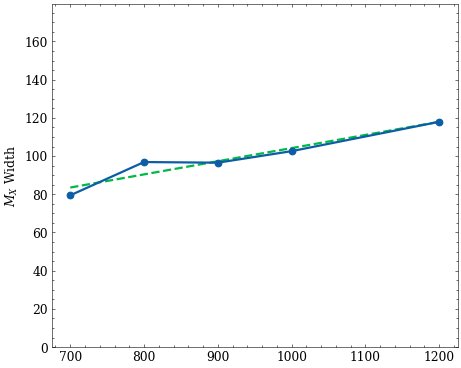

In [39]:
g_mass_width = obj_store()
study.statsplot(
    signal,
    label=[700,800,900,1000,1200],
    masks=lambda t: t.nfound_select==8,
    varlist=['X_m'],
    stat=lambda h : ak.std(h.array),
    xlabels=['$M_{X}$ Width'],

    g_g_fit='linear',
    g_exe=lambda graph, *args, **kwargs: g_mass_width.append(graph),
)
g_mass_width = g_mass_width[0]

In [50]:
mx_list = np.array([4000,
           3500,
           3000,
           2800,
           2600,
           2500,
           2400,
           2200,
           2000,
           1900,
           1800,
           1700,
           1600,
           1500,
           1400,
           1300,
           1200,
           1100,
           1000,
           950,
           900,
           850,
           800,
           750,
           700,
           650,
           600,
           550,
           500,])


In [51]:
width_list = g_mass_width.fit.evaluate(mx_list)

In [55]:
from utils.plotUtils.function import gaussian

In [84]:
x_array = np.linspace(250,5000,100)

mx_shapes = { mx:gaussian(x=x_array, mu=mx,sigma=width) for mx,width in zip(mx_list, width_list) }

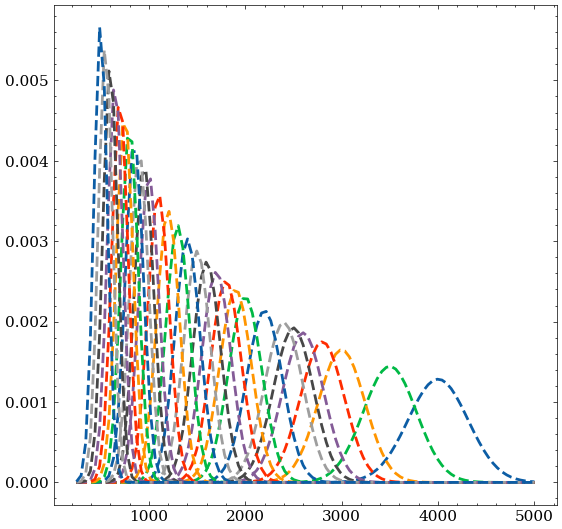

In [85]:
for shape in mx_shapes.values():
    plot_function(shape, figax='same')

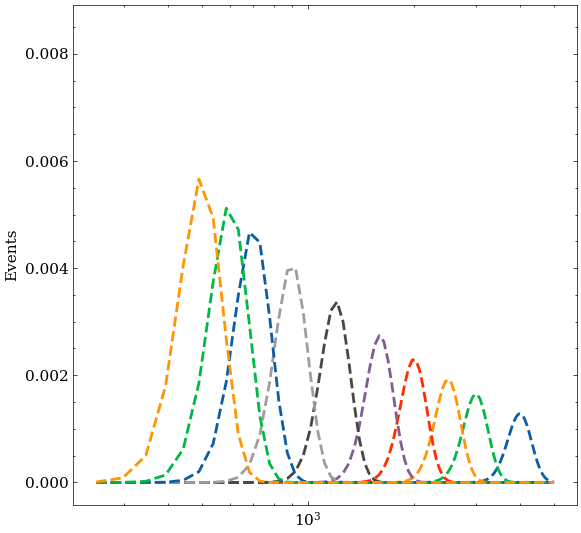

In [92]:
training_list = [4000, 3000, 2500, 2000, 1600, 1200,  900,  700, 600, 500]
# training_list = [1000,900,700,500]

for mx in training_list:
    plot_function(mx_shapes[mx], figax='same', logx=True)